In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from astro310 import *

In [2]:
starH = read_history('ezweb_adopted_star.zip')
starP = read_profile('ezweb_adopted_star.zip', 1)

In [3]:
help(read_history)
help(read_profile)

Help on function read_history in module astro310:

read_history(filename)
    Read history data from an EZ-Web output zip file
    
    Parameters
    ----------
    
    filename : string giving name of zip file
    
    Returns
    -------
    
    data: dictionary containing the history data. The following keys/values 
          appear in the dictionary:
    
        i         step index (gives index of corresponding profile)
        t         age (years)
        M         mass (Msun)
        log_L     log10(luminosity / Lsun)
        log_R     lop10(radius / Rsun)
        logT_s    log10(surface temperature / K)
        log_T_c   log10(central temprature / K)
        log_rho_c log10(central density / kg/m^3)
        log_P_c   log10(central pressure / N/m^2)
        Psi_c     central electron degeneracy parameter
        X_c       central hydrogen mass fraction
        Y_c       central helium mass fraction
        X_Cc      central carbon mass fraction
        X_Nc      central nit

In [4]:
LSUN = 3.83E26
RSUN = 6.96E8
MSUN = 1.99E30
SIGMA = 5.67E-8

In [5]:
#Part I

L_compared = 10**starH['log_L']
print(L_compared[0])

R_compared = 10**starH['log_R']
print(R_compared[0])

L = 10**starH['log_L']*LSUN
print(L[0])

R = 10**starH['log_R']*RSUN
print(R[0])

Teff = (L/(4*np.pi*R**2*SIGMA))**0.25
print(Teff[0])

404850.406802
10.3939944359
1.55057705805e+32
7234220127.37
45157.4331789


In [6]:
#Part II

print(Teff[0])

Ts = 10**starH['log_T_s']
print(Ts[0])

Tc = 10**starH['log_T_c']
print(Tc[0])

#The Teff and surface temperature are surpsisingly close to each other with the core temperature 
#being incredibly greater. The reason for the core having a greter temperature is very likely that the 
#pressure from all of the star's mass above the core causes the elements to heat up, to such a degree 
#that fusion takes place. The reason that the Teff and surface temperature is similar is likely that 
#the light we use to calculate the Teff exits the sun for the last time from the surface of the sun, 
#so they carry energy data from the surface of the sun and, when detected and used in the calculation
#for Teff, end up beig close to that of the actual surface temperature. 

45157.4331789
45198.2791417
38626101.7331


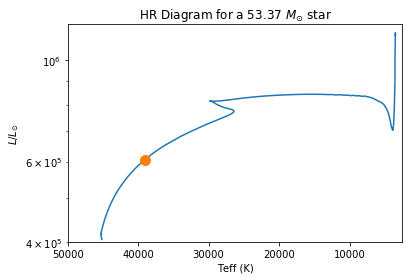

In [7]:
#Part III

plt.plot(Teff, L/LSUN)
plt.yscale('log')
plt.xlim(2500, 50000)
plt.ylim(400000, 1200000)
plt.xlabel('Teff (K)')
plt.ylabel(r'$L/L_{\odot}$')
plt.title(r'HR Diagram for a 53.37 $M_{\odot}$ star')
ax = plt.gca()
ax.invert_xaxis()
plt.plot(Teff[85], L[85]/LSUN, marker='o', markersize=10)
plt.savefig('HR_Adopted_Star.pdf')

In [8]:
#Part IV

X_c = starH['X_c']

for i in range(875):
    loopVariable = X_c[i]
    if 0.35 < loopVariable:
        index = i
    else:
        index = i
        break
        
print(index)
print(X_c[index])

t = starH['t']
print(t[index])

85
0.344778233
2392456.94


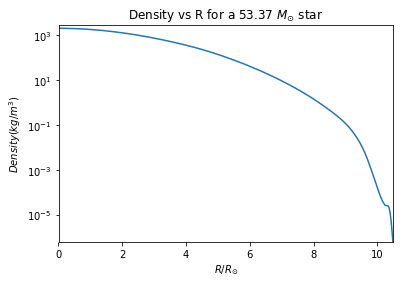

In [9]:
#Part V
plt.plot(starP['r'], starP['rho'])
plt.yscale('log')
plt.xlim(0.01, 10.5)
plt.ylim(6.2e-7, 3e3)
plt.xlabel(r'$R/R_{\odot}$')
plt.ylabel(r'$Density(kg/m^3)$')
plt.title(r'Density vs R for a 53.37 $M_{\odot}$ star')
plt.savefig('Rho_vs_R_Adopted_Star.pdf')

#Density of depleted uranium: 19100 kg/m^3

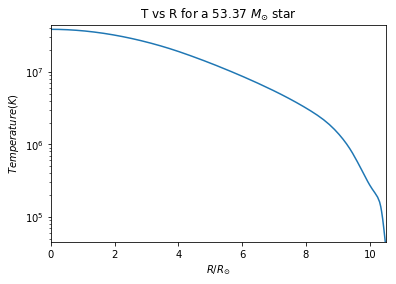

In [10]:
plt.plot(starP['r'], starP['T'])
plt.yscale('log')
plt.xlim(0.01, 10.5)
plt.ylim(45000, 45000000)
plt.xlabel(r'$R/R_{\odot}$')
plt.ylabel(r'$Temperature(K)$')
plt.title(r'T vs R for a 53.37 $M_{\odot}$ star')
plt.savefig('T_vs_R_Adopted_Star.pdf')

#Temperature of a blast furnace: 2573 K

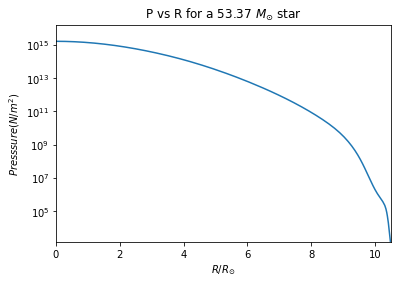

In [11]:
plt.plot(starP['r'], starP['P'])
plt.yscale('log')
plt.xlim(0.01, 10.5)
plt.ylim(1.4e3, 1.65e16)
plt.xlabel(r'$R/R_{\odot}$')
plt.ylabel(r'$Presssure(N/m^2)$')
plt.title(r'P vs R for a 53.37 $M_{\odot}$ star')
plt.savefig('P_vs_R_Adopted_Star.pdf')

#Pressure at the bottom of the Mariana Trench: 1.085922e8

C:\Users\novac\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


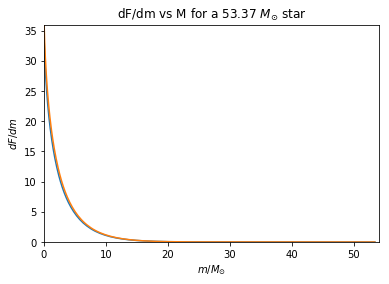

In [12]:
#Part VI

x = starP['m']*MSUN
y = starP['F']*LSUN
dy_dx = np.gradient(y) / np.gradient(x)

plot_defaults
plt.plot(starP['m'], dy_dx)
plt.plot(starP['m'], starP['q_nuc'])
plt.xlim(4.9e-6, 5.4e1)
plt.ylim(-1.7e-6, 3.6e1)
plt.xlabel(r'$m/M_{\odot}$')
plt.ylabel(r'$dF/dm$')
plt.title(r'dF/dm vs M for a 53.37 $M_{\odot}$ star')
plt.savefig('dF_vs_M_Adopted_Star.pdf')

#I could not find out how to correct this graph.

In [14]:
print(starH['L_PP'])
print(starH['L_CNO'])

[  1.08325977e+02   1.07931342e+02   1.07925340e+02   1.07925587e+02
   1.07925901e+02   1.07926284e+02   1.07926746e+02   1.07927298e+02
   1.07927950e+02   1.07928712e+02   1.07929593e+02   1.07930596e+02
   1.07938276e+02   1.07951741e+02   1.07970626e+02   1.07994567e+02
   1.08023065e+02   1.08055358e+02   1.08090344e+02   1.08126531e+02
   1.08162045e+02   1.08194697e+02   1.08222123e+02   1.08242007e+02
   1.08252362e+02   1.08251844e+02   1.08240021e+02   1.08217542e+02
   1.08186108e+02   1.08148215e+02   1.08106687e+02   1.08064088e+02
   1.08022216e+02   1.07981834e+02   1.07942711e+02   1.07903905e+02
   1.07864115e+02   1.07821925e+02   1.07775899e+02   1.07724534e+02
   1.07666162e+02   1.07598827e+02   1.07520156e+02   1.07427221e+02
   1.07316366e+02   1.07183023e+02   1.07021491e+02   1.06824715e+02
   1.06583905e+02   1.06288203e+02   1.05924406e+02   1.05476433e+02
   1.04924842e+02   1.04246264e+02   1.03412370e+02   1.02389221e+02
   1.01136144e+02   9.96034476e+01